#**Deep Learning- Final Project**
###**Shahar Siman-Tov & Noam Koren**

Import relevant libraries and functions

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, InputLayer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import optimizers

## Load the data set

Preprocess the data by splitting it into training and testing sets. Then, we normalize the pixel values of the images within the range [0, 1], making the data ready for effective neural network training.

In [ ]:
# Load dataset and convert to numbay array
(img_train, label_train) = tfds.as_numpy(tfds.load(
    'colorectal_histology',
    split='train',
    batch_size=-1,
    shuffle_files = True,
    as_supervised=True,
))

# Split dataset to 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(img_train, label_train, test_size=0.1)

# Normalize images- Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/colorectal_histology/2.0.0.incompleteIUBZSI/colorectal_histology-train.tfr…

Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


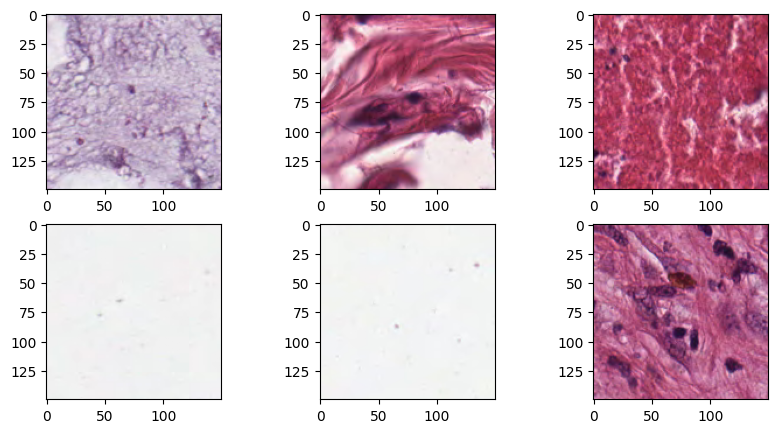

In [ ]:
# Look on examples data
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i])

In [ ]:
# Print the data structers
labels = np.unique(y_train)
print(f'Unique labels: {labels}')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

[0 1 2 3 4 5 6 7]


#### A function that Plot the loss & accuracy of the model results

In [ ]:
def Plot_accuracy_loss(model, history, X_train, X_test, y_train, y_test):
    """
    Plots the loss and accuracy curves during the training process of a model.

    Parameters:
        model (tensorflow.keras.models.Model): The trained neural network model.
        history (tensorflow.python.keras.callbacks.History): The history object returned by model.fit().
        X_train (numpy.ndarray): The input data for training the model.
        X_test (numpy.ndarray): The input data for testing the model.
        y_train (numpy.ndarray): The target labels for training the model.
        y_test (numpy.ndarray): The target labels for testing the model.

    Returns:
        tuple: A tuple containing the training and testing loss and accuracy values.

    """
    # Evaluate the model on the training data to get the training loss and accuracy
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    p_train_loss = round(train_loss * 100, 2)  # Convert to percentage with 2 decimal points
    p_train_accuracy = round(train_accuracy * 100, 2)  # Convert to percentage with 2 decimal points

    # Evaluate the model on the testing data to get the testing loss and accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    p_test_loss = round(test_loss * 100, 2)  # Convert to percentage with 2 decimal points
    p_test_accuracy = round(test_accuracy * 100, 2)  # Convert to percentage with 2 decimal points

    # Reset the style to the default "classic" style
    plt.style.use('default')

    # Create a figure with 2 subplots side by side for plotting loss and accuracy curves
    plt.figure(figsize=(10, 5), facecolor='None')  # Set the facecolor to "None" for transparent background

    # Plot the training and testing loss curves in the first subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'Loss (test: {p_test_loss}%)', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.grid()
    plt.legend()

    # Plot the training and testing accuracy curves in the second subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'Accuracy (test: {p_test_accuracy}%)', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid()
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

    # Return the training and testing loss and accuracy values
    return p_train_loss, p_train_accuracy, p_test_loss, p_test_accuracy

## **Model 1: clasic CNN model**

First, we construct a CNN with four layers, where the final layer comprises eight neurons (matching the number of classes) using softmax activation. Next, we compile the model, utilizing the RMSprop optimizer.

In [ ]:
# Create a sequential model
model_cnn = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
# Input shape: (150, 150, 3) corresponds to 150x150 RGB images (3 channels).
model_cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))

# Add a max-pooling layer with a 2x2 pool size to downsample the feature maps.
model_cnn.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add another max-pooling layer with a 2x2 pool size for downsampling.
model_cnn.add(MaxPooling2D((2, 2)))

# Add the third convolutional layer with 128 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add another max-pooling layer with a 2x2 pool size for downsampling.
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the 3D feature maps into a 1D vector for the fully connected layers.
model_cnn.add(Flatten())

# Add a fully connected (dense) layer with 64 units and 'relu' activation.
model_cnn.add(Dense(64, activation='relu'))

# Add the final fully connected (dense) layer with 8 units and 'softmax' activation for multi-class classification.
model_cnn.add(Dense(8, activation='softmax'))

# Compile the model with the 'rmsprop' optimizer, 'sparse_categorical_crossentropy' loss function,
# and use 'accuracy' as the evaluation metric.
model_cnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the training data (X_train and y_train) for 20 epochs and a batch size of 100.
# Use the validation data (X_test and y_test) to monitor the model's performance during training.
history_cnn = model_cnn.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

16/16 [==============================] - 0s 5ms/step - loss: 0.7857 - accuracy: 0.7360


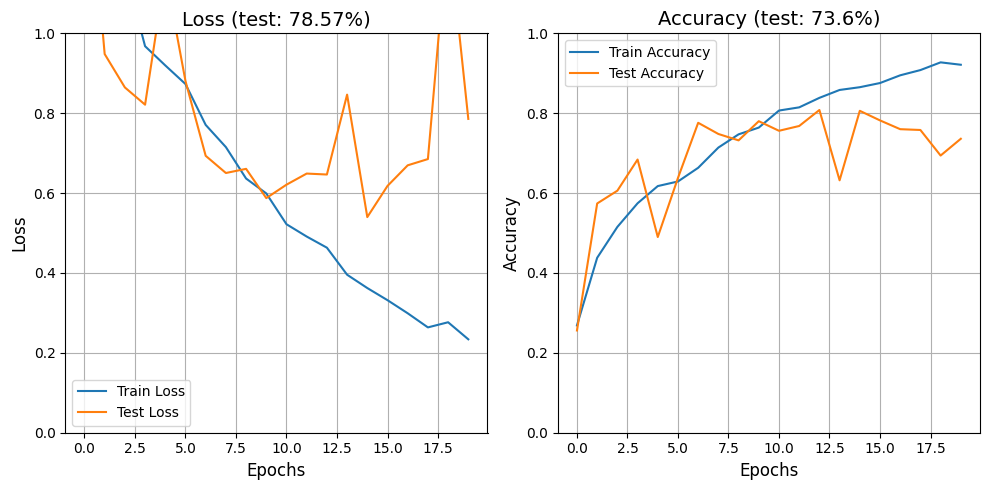

In [ ]:
# Plot the CNN model results
train_loss_CNN, train_accuracy_CNN, test_loss_CNN, test_accuracy_CNN = Plot_accuracy_loss(model_cnn, history_cnn, X_train, X_test, y_train, y_test)

## **Model 2: VGG-16 model with transfer learning & fine tuning**

We begin by loading the VGG-16 model, excluding the top layer, and apply transfer learning. We set all layers to be non-trainable, add our custom top layer, freeze the weights of the first layer, and proceed to train the top layer of the model.

In [ ]:
# Loading pre trained vgg-16 network without the top
vgg16 = tf.keras.applications.VGG16(input_shape=(150,150,3), include_top=False,weights='imagenet')

# Freeze weights- make all layers not trainable
vgg16.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Print the layers
print('#layer \t layer-name \t trainable')
print('------ \t ---------- \t ---------')

for (i,layer) in enumerate(vgg16.layers):
    print(str(i),'\t', layer.__class__.__name__, '\t',layer.trainable)

#layer 	 layer-name 	 trainable
------ 	 ---------- 	 ---------
0 	 InputLayer 	 False
1 	 Conv2D 	 False
2 	 Conv2D 	 False
3 	 MaxPooling2D 	 False
4 	 Conv2D 	 False
5 	 Conv2D 	 False
6 	 MaxPooling2D 	 False
7 	 Conv2D 	 False
8 	 Conv2D 	 False
9 	 Conv2D 	 False
10 	 MaxPooling2D 	 False
11 	 Conv2D 	 False
12 	 Conv2D 	 False
13 	 Conv2D 	 False
14 	 MaxPooling2D 	 False
15 	 Conv2D 	 False
16 	 Conv2D 	 False
17 	 Conv2D 	 False
18 	 MaxPooling2D 	 False


After loading the VGG-16 model without the top layer and applying transfer learning, we add a custom head consisting of two additional layers along with a dropout layer with a rate of 50% to the VGG model. We then set all layers to be non-trainable, except for the custom head layers, and proceed to train the entire model with the added head on the specific task at hand.

In [ ]:
# Add the VGG-16 to the model
model_vgg = Sequential()
model_vgg.add(vgg16)

# Train a newtop (costum head)
# Add a Flatten layer to convert the 3D feature maps into a 1D vector
model_vgg.add(Flatten())

# Add a fully connected (dense) layer with 1024 units and 'relu' activation
model_vgg.add(Dense(1024, activation='relu'))

# Add a Dropout layer to prevent overfitting by randomly setting a fraction of inputs to 0 during training
model_vgg.add(Dropout(0.5))

# Add the final fully connected (dense) layer with 8 units and 'softmax' activation for multi-class classification
model_vgg.add(Dense(8, activation='softmax'))

In [ ]:
# Freeze the first layer weights
model_vgg.layers[0].trainable = False

In [ ]:
# Compile the VGG-16 model with RMSProp optimizer
model_vgg.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the VGG-16 model
history_vgg = model_vgg.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))

In [ ]:
# Plot the VGG-16 model results
train_loss_VGG, train_accuracy_VGG, test_loss_VGG, test_accuracy_VGG = Plot_accuracy_loss(model_vgg, history_vgg, X_train, X_test, y_train, y_test)

### Fine tuning

In [ ]:
# Unfreeze the first layer
model_vgg.layers[0].trainable = True

# Using the VGG model for another optimizer
model_vgg_ft = model_vgg

# Compile the VGG-16 model with fine tuning
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model_vgg_ft.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the VGG-16 model with fine tuning
history_vgg_fine_tuning = model_vgg_ft.fit(X_train, y_train, epochs=25, batch_size=80, validation_data=(X_test, y_test))

In [ ]:
# Plot the VGG fine tuning model results
train_loss_VGG_ft, train_accuracy_VGG_ft, test_loss_VGG_ft, test_accuracy_VGG_ft= Plot_accuracy_loss(model_vgg, history_vgg_fine_tuning, X_train, X_test, y_train, y_test)

## **Model 3: VGG & Data Augmentation**

In [ ]:
#our model for data augmentation- vgg model with transfer learning
model_data_aug_vgg = model_vgg_ft

# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=0.2, zoom_range=0.1, fill_mode='nearest')

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Create an iterator for generating augmented images
augmented_iterator = datagen.flow(X_train, y_train, batch_size=40)

In [ ]:
# Check the augmented data that was created using data augmentation techniques.
x_batch, y_batch = augmented_iterator.next()

# Create a plot to display the original images and their corresponding augmented versions side by side.

# Set the figure size for the plot
plt.figure(figsize=(15, 5))

# Loop over the first 8 images in the batch to display them.
for i in range(8):
    # Subplot for the original image
    plt.subplot(2, 8, i+1)
    plt.imshow(X_train[i])
    plt.title('Original')
    plt.axis('off')

    # Subplot for the augmented image
    plt.subplot(2, 8, 8+i+1)
    plt.imshow(x_batch[i])
    plt.title('Augmented')
    plt.axis('off')

In [ ]:
# Train the model using augmented_iterator with the current batch size
history_aug = model_data_aug_vgg.fit(augmented_iterator, epochs=30, validation_data=(X_test, y_test))

In [ ]:
# Plot the VGG & augmentation model results
train_loss_VGG_aug, train_accuracy_VGG_aug, test_loss_VGG_aug, test_accuracy_VGG_aug= Plot_accuracy_loss(model_data_aug_vgg, history_aug, X_train, X_test, y_train, y_test)

## **Model 4: CNN Data Augmentation**

In [ ]:
# Apply data augmentation on the CNN model to the training data using the ImageDataGenerator.

# Create a new CNN model and use the same architecture as the original model_cnn.
model_data_aug_cnn = model_cnn

# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=0.2, zoom_range=0.1, fill_mode='nearest')

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Create an iterator for generating augmented images
augmented_iterator = datagen.flow(X_train, y_train, batch_size=40)

In [ ]:
# Train the CNN & augmentation model using augmented_iterator with the current batch size
history_aug = model_data_aug_cnn.fit(augmented_iterator, epochs=30, validation_data=(X_test, y_test))

In [ ]:
# Plot the CNN & augmentation model results
train_loss_CNN_aug, train_accuracy_CNN_aug, test_loss_CNN_aug, test_accuracy_CNN_aug= Plot_accuracy_loss(model_data_aug_cnn, history_aug, X_train, X_test, y_train, y_test)

## **Model 5: VGG with FT & ADAM Optimizer**

ADAM is an adaptive optimization algorithm commonly used in machine learning and deep learning. It adjusts the learning rate for each parameter based on historical gradient information, leading to faster convergence and better performance.

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
# Using the VGG model with another optimizer
model_vgg_adam = model_vgg_ft

# Recompile the model with a slower learning rate using Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_vgg_adam.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the vgg_model again for fine-tuning
adam_history = model_vgg_adam.fit(X_train, y_train, epochs=30, batch_size=35, validation_data=(X_test, y_test))

In [ ]:
# Plot the new VGG model results
train_loss_adam, train_accuracy_adam, test_loss_adam, test_accuracy_adam= Plot_accuracy_loss(model_vgg_adam, adam_history, X_train, X_test, y_train, y_test)

## **Model 6: CNN with Dropout**

We implement a CNN with an equivalent number of layers, augmenting it with a 50% dropout layer.

In [ ]:
# Create a new sequential model for the CNN with Dropout
model_cnn_Dropout = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
# Input shape: (150, 150, 3) corresponds to 150x150 RGB images (3 channels).
model_cnn_Dropout.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))

# Add a max-pooling layer with a 2x2 pool size to downsample the feature maps.
model_cnn_Dropout.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
model_cnn_Dropout.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add another max-pooling layer with a 2x2 pool size for downsampling.
model_cnn_Dropout.add(MaxPooling2D((2, 2)))

# Flatten the 3D feature maps into a 1D vector for the fully connected layers.
model_cnn_Dropout.add(Flatten())

# Add a fully connected (dense) layer with 64 units and 'relu' activation.
model_cnn_Dropout.add(Dense(64, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5.
# Dropout layers help prevent overfitting by randomly setting 50% of inputs to 0 during training.
model_cnn_Dropout.add(Dropout(0.5))

# Add the final fully connected (dense) layer with 8 units and 'softmax' activation for multi-class classification.
model_cnn_Dropout.add(Dense(8, activation='softmax'))

# Compile the model with the 'rmsprop' optimizer, 'sparse_categorical_crossentropy' loss function,
# and use 'accuracy' as the evaluation metric.
model_cnn_Dropout.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN with dropout model (with validation):
history_cnn_Dropout = model_cnn_Dropout.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))

In [ ]:
# Plot the CNN with dropout model results
train_loss_CNN_Dropout, train_accuracy_CNN_Dropout, test_loss_CNN_Dropout, test_accuracy_CNN_Dropout= Plot_accuracy_loss(model_cnn_Dropout, history_cnn_Dropout, X_train, X_test, y_train, y_test)

## **Model 7: VGG with Different Number of Layers**

Add 2 more fully connected (dense) layer with 1024 units and 'relu' activation

In [ ]:
# Loading pre trained vgg16 network
vgg16 = tf.keras.applications.VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Make all layers not trainable
vgg16.trainable = False

In [ ]:
# Create a new sequential model for the VGG-16 with a custom head (A2L = Add 2 Layers)
vgg_model_A2L = Sequential()

# Add the VGG-16 model as the base model (pre-trained on ImageNet dataset)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add the VGG-16 model to the new sequential model
vgg_model_A2L.add(vgg16)

# Add a Flatten layer to convert the 3D feature maps into a 1D vector
vgg_model_A2L.add(Flatten())

# Add a fully connected (dense) layer with 1024 units and 'relu' activation
vgg_model_A2L.add(Dense(1024, activation='relu'))

# Add another fully connected (dense) layer with 1024 units and 'relu' activation (an added layer)
vgg_model_A2L.add(Dense(1024, activation='relu'))

# Add another fully connected (dense) layer with 2056 units and 'relu' activation (an added layer)
vgg_model_A2L.add(Dense(2056, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5
# Dropout layers help prevent overfitting by randomly setting 50% of inputs to 0 during training
vgg_model_A2L.add(Dropout(0.5))

# Add the final fully connected (dense) layer with 8 units and 'softmax' activation for multi-class classification
vgg_model_A2L.add(Dense(8, activation='softmax'))

In [ ]:
# Freeze the first layer
vgg_model_A2L.layers[0].trainable = False

# Compile the model
vgg_model_A2L.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fine tunning
vgg_model_A2L.layers[0].trainable = True

# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
vgg_model_A2L.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg_A2L = vgg_model_A2L.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))

In [ ]:
# Plot the last VGG model results
train_loss_VGG_A2L, train_accuracy_VGG_A2L, test_loss_VGG_A2L, test_accuracy_VGG_A2L= Plot_accuracy_loss(vgg_model_A2L, history_vgg_A2L, X_train, X_test, y_train, y_test)

# **Results**

Compare the results of all the models

In [ ]:
# Define the models results
model_results = [
    {"Model": 'CNN', "Train Loss": train_loss_CNN, "Train Accuracy": train_accuracy_CNN, "Test Loss": test_loss_CNN, "Test Accuracy": test_accuracy_CNN},
    {"Model": 'VGG', "Train Loss": train_loss_VGG, "Train Accuracy": train_accuracy_VGG, "Test Loss": test_loss_VGG, "Test Accuracy": test_accuracy_VGG},
    {"Model": 'VGG fine tuning', "Train Loss": train_loss_VGG_ft, "Train Accuracy": train_accuracy_VGG_ft, "Test Loss": test_loss_VGG_ft, "Test Accuracy": test_accuracy_VGG_ft},
    {"Model": 'VGG augmentation', "Train Loss": train_loss_VGG_aug, "Train Accuracy": train_accuracy_VGG_aug, "Test Loss": test_loss_VGG_aug , "Test Accuracy": test_accuracy_VGG_aug},
    {"Model": 'CNN augmentation', "Train Loss": train_loss_CNN_aug, "Train Accuracy": train_accuracy_CNN_aug, "Test Loss": test_loss_CNN_aug , "Test Accuracy": test_accuracy_CNN_aug},
    {"Model": 'VGG FT & ADAM', "Train Loss": train_loss_adam, "Train Accuracy": train_accuracy_adam, "Test Loss": test_loss_adam, "Test Accuracy": test_accuracy_adam},
    {"Model": 'CNN dropout regularization', "Train Loss": train_loss_CNN_DA, "Train Accuracy": train_accuracy_CNN_DA, "Test Loss": test_loss_CNN_DA, "Test Accuracy": test_accuracy_CNN_DA},
    {"Model": 'VGG Add Layers', "Train Loss": train_loss_VGG_A2L, "Train Accuracy": train_accuracy_VGG_A2L, "Test Loss": test_loss_VGG_A2L, "Test Accuracy": test_accuracy_VGG_A2L}]

# Create a DataFrame from the model results
results_df = pd.DataFrame(model_results)

# Set the 'Model' column as the index
results_df.set_index('Model', inplace=True)

# Display the table
results_df

,Train Loss,Train Accuracy,Test Loss,Test Accuracy
Model,,,,
CNN,15.76,94.42,84.40,79.4
VGG,3.90,99.02,65.39,87.8
VGG fine tuning,0.18,99.91,48.80,92.0
VGG augmentation,0.76,99.76,55.89,91.2
CNN augmentation,4.46,98.53,65.28,84.6
VGG FT & ADAM,3.92,98.60,46.77,90.8
CNN dropout regularization,8.48,97.71,91.40,78.0
VGG Add Layers,0.46,99.89,45.50,91.0


Creating a bar plot to visualize the test accuracies of all the different models.

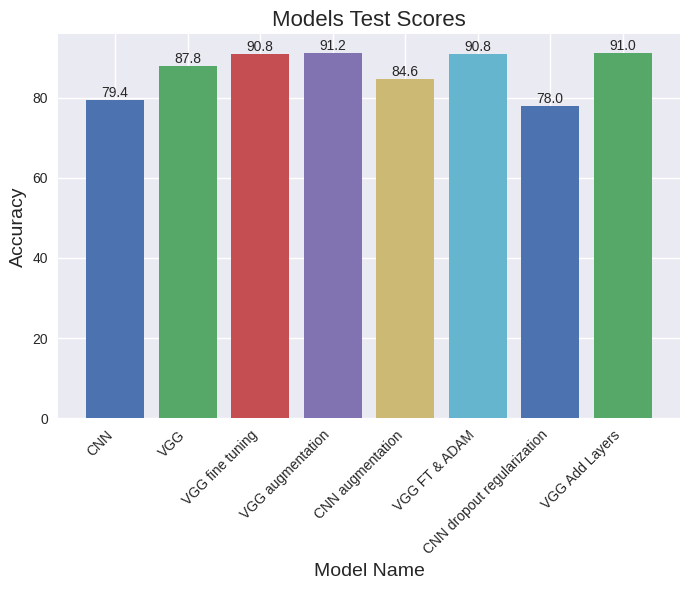

In [ ]:
# test_scores contains the test accuracies obtained for each model.
test_scores = [test_accuracy_CNN, test_accuracy_VGG, test_accuracy_VGG_ft, test_accuracy_VGG_aug, test_accuracy_CNN_aug,
               test_accuracy_adam, test_accuracy_CNN_DA, test_accuracy_VGG_A2L]

# models_names contains the names of the corresponding models, matching the order of test_scores.
models_names = ['CNN', 'VGG', 'VGG fine-tuning', 'VGG augmentation', 'CNN augmentation',
                'VGG FT & ADAM', 'CNN dropout regularization', 'VGG Add Layers']

# Create a bar plot to visualize the test accuracies of the models.

# Set the figure size for the plot
plt.figure(figsize=(7, 6))

# Loop over each model and its corresponding test accuracy to create the bars and annotate the accuracy value on top.
for i, (model, test) in enumerate(zip(models_names, test_scores)):
    # Add a bar for each model
    plt.bar(i, test, align='center', label=model)
    # Annotate the accuracy value on top of the bar, using 1 decimal place
    plt.text(i, test, f'{test:.1f}', ha='center', va='bottom')

# Set labels and title for the plot
plt.xlabel('Model Name', size=14)
plt.ylabel('Accuracy', size=14)
plt.title('Models Test Scores', size=16)

# Display grid lines on the plot
plt.grid(True)

# Set the x-axis labels to the model names, rotating them at 45 degrees for better visibility.
plt.xticks(np.arange(len(models_names)), models_names, rotation=45, ha='right')

# Adjust the layout to prevent label cutoffs
plt.tight_layout()

# Display the plot
plt.show()

15 test examples with their labels

16/16 [==============================] - 0s 12ms/step


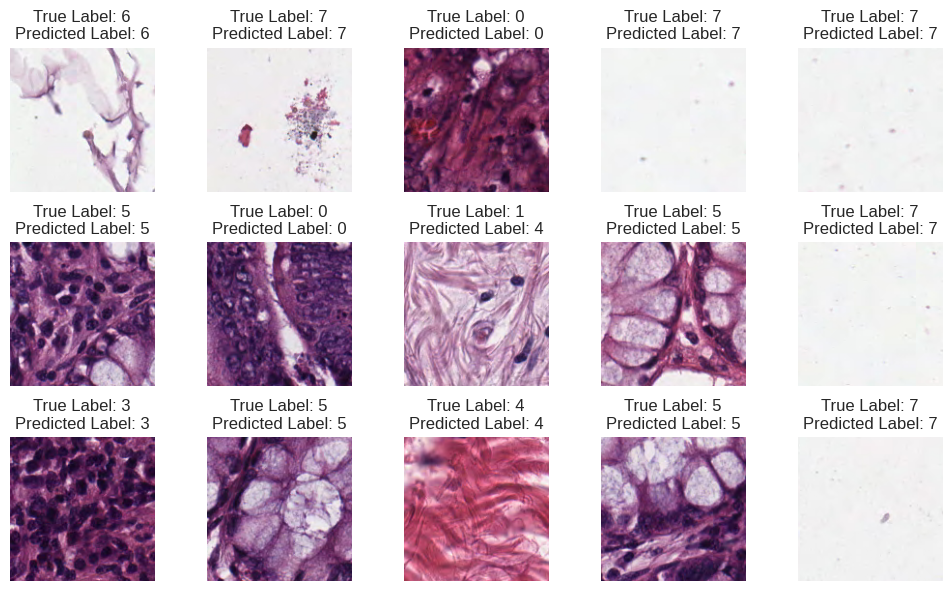

In [ ]:
# Get predictions for test examples using the pre-trained 'model_vgg_ft'
predictions = model_vgg_ft.predict(X_test)

# Choose 15 random test examples from the test dataset without replacement
random_indices = np.random.choice(range(len(X_test)), size=15, replace=False)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 6))

# Loop over the randomly chosen test examples
for i, index in enumerate(random_indices):
    # Retrieve the image and its true label from the test dataset
    image = X_test[index]
    true_label = y_test[index]

    # Get the predicted label for the current test example
    predicted_label = np.argmax(predictions[index])  # Find the index of the maximum prediction probability

    # Create a subplot to display the current test example
    plt.subplot(3, 5, i + 1)

    # Display the image
    plt.imshow(image)

    # Set the title to show the true label and the predicted label for the current test example
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")

    # Turn off axis labels and ticks for a cleaner visualization
    plt.axis('off')

# Adjust the layout to prevent label cutoffs
plt.tight_layout()

# Display the plot with the randomly chosen test examples and their predictions
plt.show()